# Project | Machine Learning Models Evaluation

## <font color='DarkBlue'>I. <ins>Loading the Dataset</ins>: <font color='blue'></font>

### <font color='MediumBlue'>1 - <ins> Importing libraries</ins>: <font color='violet'></font>

In [1]:
# ! pip install missingno
import pollyfonctions as po
po.import_models()
from sklearn import linear_model
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate



In [2]:
import julestools as jt

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from plotly import express as px

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier

from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.utils import resample

import imblearn
from imblearn.over_sampling import SMOTE

In [3]:
pd.set_option('display.max_columns', None)


### <font color='MediumBlue'>2 - <ins>Dataset source</ins>: <font color='violet'></font>

<ins><strong>Source: </strong></ins>

In [4]:
source = '../data/data.csv'

### <font color='MediumBlue'>3 - <ins>  Loading datasets into DataFrames</ins>: <font color='violet'></font>

In [5]:
df = pd.read_csv(source)

##  <font color='DarkBlue'>II. <ins>Exploring the Dataset</ins>: <font color='blue'></font>

### <font color='MediumBlue'>1 - <ins> Datasets Overview</ins>: <font color='violet'></font>

#### <font color='CornflowerBlue'>a) Displaying number of rows and number of columns: </font>

In [6]:
print(f"{df.shape[0]} rows, {df.shape[1]} columns")

6819 rows, 96 columns


#### <font color='CornflowerBlue'>b) Glancing at the datasets: </font>

<ins><strong>What the dataset looks like ? </strong></ins>

In [7]:
df.head(2)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.40575,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,0.000126,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,0.000147,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.51673,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,0.000290,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.

<ins><strong>What are the data types ? </strong></ins>

In [8]:
df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

## Cleaning Column Names

<strong><em>Stripping, renaming in lower case and replacing spaces with "_" :</strong></em>

In [9]:
def fix_col_names(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(r'\s+','_',regex=True)
    return df

fix_col_names(df)

,bankrupt?,roa(c)_before_interest_and_depreciation_before_interest,roa(a)_before_interest_and_%_after_tax,roa(b)_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre-tax_net_interest_rate,after-tax_net_interest_rate,non-industry_income_and_expenditure/revenue,continuous_interest_rate_(after_tax),operating_expense_rate,research_and_development_expense_rate,cash_flow_rate,interest-bearing_debt_interest_rate,tax_rate_(a),net_value_per_share_(b),net_value_per_share_(a),net_value_per_share_(c),persistent_eps_in_the_last_four_seasons,cash_flow_per_share,revenue_per_share_(yuan_¥),operating_profit_per_share_(yuan_¥),per_share_net_profit_before_tax_(yuan_¥),realized_sales_gross_profit_growth_rate,operating_profit_growth_rate,after-tax_net_profit_growth_rate,regular_net_profit_growth_rate,continuous_net_profit_growth_rate,total_asset_growth_rate,net_value_growth_rate,total_asset_return_growth_rate_ratio,cash_reinvestment_%,current_ratio,quick_ratio,interest_expense_ratio,total_debt/total_net_worth,debt_ratio_%,net_worth/assets,long-term_fund_suitability_ratio_(a),borrowing_dependency,contingent_liabilities/net_worth,operating_profit/paid-in_capital,net_profit_before_tax/paid-in_capital,inventory_and_accounts_receivable/net_value,total_asset_turnover,accounts_receivable_turnover,average_collection_days,inventory_turnover_rate_(times),fixed_assets_turnover_frequency,net_worth_turnover_rate_(times),revenue_per_person,operating_profit_per_person,allocation_rate_per_person,working_capital_to_total_assets,quick_assets/total_assets,current_assets/total_assets,cash/total_assets,quick_assets/current_liability,cash/current_liability,current_liability_to_assets,operating_funds_to_liability,inventory/working_capital,inventory/current_liability,current_liabilities/liability,working_capital/equity,current_liabilities/equity,long-term_liability_to_current_assets,retained_earnings_to_total_assets,total_income/total_expense,total_expense/assets,current_asset_turnover_rate,quick_asset_turnover_rate,working_capitcal_turnover_rate,cash_turnover_rate,cash_flow_to_sales,fixed_assets_to_assets,current_liability_to_liability,current_liability_to_equity,equity_to_long-term_liability,cash_flow_to_total_assets,cash_flow_to_liability,cfo_to_assets,cash_flow_to_equity,current_liability_to_current_assets,liability-assets_flag,net_income_to_total_assets,total_assets_to_gnp_price,no-credit_interval,gross_profit_to_sales,net_income_to_stockholder's_equity,liability_to_equity,degree_of_financial_leverage_(dfl),interest_coverage_ratio_(interest_expense_to_ebit),net_income_flag,equity_to_liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

### <font color='MediumBlue'>2 - <ins> Identifying variables and their specifications</ins>: <font color='violet'></font>

<ins><strong>Displaying number of unique values for each column : </strong></ins>

In [10]:
df.nunique()

bankrupt?                                                     2
roa(c)_before_interest_and_depreciation_before_interest    3333
roa(a)_before_interest_and_%_after_tax                     3151
roa(b)_before_interest_and_depreciation_after_tax          3160
operating_gross_margin                                     3781
                                                           ... 
liability_to_equity                                        6819
degree_of_financial_leverage_(dfl)                         6240
interest_coverage_ratio_(interest_expense_to_ebit)         6240
net_income_flag                                               1
equity_to_liability                                        6819
Length: 96, dtype: int64

<ins><strong>Displaying number of unique values for each column that has less than 10 distinct values : </strong></ins>

In [11]:
df.nunique()[lambda x: x <= 10]

bankrupt?                2
liability-assets_flag    2
net_income_flag          1
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   bankrupt?                                                6819 non-null   int64  
 1   roa(c)_before_interest_and_depreciation_before_interest  6819 non-null   float64
 2   roa(a)_before_interest_and_%_after_tax                   6819 non-null   float64
 3   roa(b)_before_interest_and_depreciation_after_tax        6819 non-null   float64
 4   operating_gross_margin                                   6819 non-null   float64
 5   realized_sales_gross_margin                              6819 non-null   float64
 6   operating_profit_rate                                    6819 non-null   float64
 7   pre-tax_net_interest_rate                                6819 non-null   float64
 8   after-tax_net_interest_rate 

### <font color='MediumBlue'>3 - <ins> Formatting & Cleaning data</ins>: <font color='violet'></font>

<ins><strong>Dealing with columns with Null values : </strong></ins>

In [13]:
print(*list(df.isna().any()[lambda x: x == True].index),sep="\n")

In [14]:
df.isna().sum()

bankrupt?                                                  0
roa(c)_before_interest_and_depreciation_before_interest    0
roa(a)_before_interest_and_%_after_tax                     0
roa(b)_before_interest_and_depreciation_after_tax          0
operating_gross_margin                                     0
                                                          ..
liability_to_equity                                        0
degree_of_financial_leverage_(dfl)                         0
interest_coverage_ratio_(interest_expense_to_ebit)         0
net_income_flag                                            0
equity_to_liability                                        0
Length: 96, dtype: int64

In [15]:
df.isna().any()[lambda x: x == True].index.tolist()

[]

<ins><strong>Columns to remove : </strong></ins>

In [16]:
col_to_remove = ['net_income_flag']

In [17]:
df = po.drop_col(df, col_to_remove)
print(f"{df.shape[0]} rows, {df.shape[1]} columns")

6819 rows, 95 columns


##  <font color='DarkBlue'>III. <ins> EDA Exploratory Data Analysis</ins>: <font color='blue'></font>

### <font color='MediumBlue'>2 - <ins> Analysing correlations</ins>: <font color='violet'></font>

In [18]:
correlations_matrix = po.corr_matrix(df)

In [19]:
high_corr_threshold = 0.8
highly_correlated_pairs = []

for i in range(len(correlations_matrix.columns)):
    for j in range(i):
        if abs(correlations_matrix.iloc[i, j]) > high_corr_threshold:
            col_pair = (correlations_matrix.columns[i], correlations_matrix.columns[j], correlations_matrix.iloc[i, j])
            highly_correlated_pairs.append(col_pair)


print(f"Number of highly correlated pairs: {len(highly_correlated_pairs)}")


for pair in highly_correlated_pairs:
    print(f"Columns: {pair[0]} and {pair[1]} - Correlation: {pair[2]}")
    

Number of highly correlated pairs: 43
Columns: roa(a)_before_interest_and_%_after_tax and roa(c)_before_interest_and_depreciation_before_interest - Correlation: 0.9401237079700807
Columns: roa(b)_before_interest_and_depreciation_after_tax and roa(c)_before_interest_and_depreciation_before_interest - Correlation: 0.9868494970182541
Columns: roa(b)_before_interest_and_depreciation_after_tax and roa(a)_before_interest_and_%_after_tax - Correlation: 0.9557406252835042
Columns: realized_sales_gross_margin and operating_gross_margin - Correlation: 0.9995182781255221
Columns: pre-tax_net_interest_rate and operating_profit_rate - Correlation: 0.9164477798560053
Columns: after-tax_net_interest_rate and operating_profit_rate - Correlation: 0.8621907071596802
Columns: after-tax_net_interest_rate and pre-tax_net_interest_rate - Correlation: 0.9863790242582028
Columns: continuous_interest_rate_(after_tax) and operating_profit_rate - Correlation: 0.9155437834862158
Columns: continuous_interest_rate_

In [20]:
highly_correlated_pairs

[('roa(a)_before_interest_and_%_after_tax',
  'roa(c)_before_interest_and_depreciation_before_interest',
  0.9401237079700807),
 ('roa(b)_before_interest_and_depreciation_after_tax',
  'roa(c)_before_interest_and_depreciation_before_interest',
  0.9868494970182541),
 ('roa(b)_before_interest_and_depreciation_after_tax',
  'roa(a)_before_interest_and_%_after_tax',
  0.9557406252835042),
 ('realized_sales_gross_margin', 'operating_gross_margin', 0.9995182781255221),
 ('pre-tax_net_interest_rate', 'operating_profit_rate', 0.9164477798560053),
 ('after-tax_net_interest_rate', 'operating_profit_rate', 0.8621907071596802),
 ('after-tax_net_interest_rate',
  'pre-tax_net_interest_rate',
  0.9863790242582028),
 ('continuous_interest_rate_(after_tax)',
  'operating_profit_rate',
  0.9155437834862158),
 ('continuous_interest_rate_(after_tax)',
  'pre-tax_net_interest_rate',
  0.9936165193085659),
 ('continuous_interest_rate_(after_tax)',
  'after-tax_net_interest_rate',
  0.984452328775917),
 ('

In [21]:
type(highly_correlated_pairs[1])

tuple

In [22]:

def find_highly_correlated_columns(df, high_corr_threshold=0.8):
    correlations_matrix = df.corr().abs()
    
    highly_correlated_groups = []

    for i in range(len(correlations_matrix.columns)):
        correlated_cols = set()
        for j in range(i):
            if abs(correlations_matrix.iloc[i, j]) > high_corr_threshold:
                correlated_cols.add(correlations_matrix.columns[j])
        
        if correlated_cols:
            correlated_cols.add(correlations_matrix.columns[i])
            highly_correlated_groups.append(correlated_cols)

    return highly_correlated_groups



highly_correlated_groups = find_highly_correlated_columns(df)

print(f"Number of highly correlated groups: {len(highly_correlated_groups)}")

for group in highly_correlated_groups:
    print(f"Columns: {', '.join(group)}")


Number of highly correlated groups: 25
Columns: roa(a)_before_interest_and_%_after_tax, roa(c)_before_interest_and_depreciation_before_interest
Columns: roa(b)_before_interest_and_depreciation_after_tax, roa(a)_before_interest_and_%_after_tax, roa(c)_before_interest_and_depreciation_before_interest
Columns: realized_sales_gross_margin, operating_gross_margin
Columns: pre-tax_net_interest_rate, operating_profit_rate
Columns: after-tax_net_interest_rate, pre-tax_net_interest_rate, operating_profit_rate
Columns: after-tax_net_interest_rate, continuous_interest_rate_(after_tax), pre-tax_net_interest_rate, operating_profit_rate
Columns: net_value_per_share_(a), net_value_per_share_(b)
Columns: net_value_per_share_(c), net_value_per_share_(a), net_value_per_share_(b)
Columns: operating_profit_per_share_(yuan_¥), persistent_eps_in_the_last_four_seasons
Columns: operating_profit_per_share_(yuan_¥), per_share_net_profit_before_tax_(yuan_¥), persistent_eps_in_the_last_four_seasons
Columns: after

In [23]:
type(highly_correlated_groups[1])

set

In [24]:
highly_correlated_pairs

[('roa(a)_before_interest_and_%_after_tax',
  'roa(c)_before_interest_and_depreciation_before_interest',
  0.9401237079700807),
 ('roa(b)_before_interest_and_depreciation_after_tax',
  'roa(c)_before_interest_and_depreciation_before_interest',
  0.9868494970182541),
 ('roa(b)_before_interest_and_depreciation_after_tax',
  'roa(a)_before_interest_and_%_after_tax',
  0.9557406252835042),
 ('realized_sales_gross_margin', 'operating_gross_margin', 0.9995182781255221),
 ('pre-tax_net_interest_rate', 'operating_profit_rate', 0.9164477798560053),
 ('after-tax_net_interest_rate', 'operating_profit_rate', 0.8621907071596802),
 ('after-tax_net_interest_rate',
  'pre-tax_net_interest_rate',
  0.9863790242582028),
 ('continuous_interest_rate_(after_tax)',
  'operating_profit_rate',
  0.9155437834862158),
 ('continuous_interest_rate_(after_tax)',
  'pre-tax_net_interest_rate',
  0.9936165193085659),
 ('continuous_interest_rate_(after_tax)',
  'after-tax_net_interest_rate',
  0.984452328775917),
 ('

##  <font color='DarkBlue'>IV. <ins> Reprocessing: Feature Selection</ins> <font color='blue'></font>

### <font color='MediumBlue'>1- <ins> Scaling the data</ins>: <font color='violet'></font>

In [25]:

df.rename(columns={'bankrupt?': 'bankrupt'}, inplace=True)

df

,bankrupt,roa(c)_before_interest_and_depreciation_before_interest,roa(a)_before_interest_and_%_after_tax,roa(b)_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre-tax_net_interest_rate,after-tax_net_interest_rate,non-industry_income_and_expenditure/revenue,continuous_interest_rate_(after_tax),operating_expense_rate,research_and_development_expense_rate,cash_flow_rate,interest-bearing_debt_interest_rate,tax_rate_(a),net_value_per_share_(b),net_value_per_share_(a),net_value_per_share_(c),persistent_eps_in_the_last_four_seasons,cash_flow_per_share,revenue_per_share_(yuan_¥),operating_profit_per_share_(yuan_¥),per_share_net_profit_before_tax_(yuan_¥),realized_sales_gross_profit_growth_rate,operating_profit_growth_rate,after-tax_net_profit_growth_rate,regular_net_profit_growth_rate,continuous_net_profit_growth_rate,total_asset_growth_rate,net_value_growth_rate,total_asset_return_growth_rate_ratio,cash_reinvestment_%,current_ratio,quick_ratio,interest_expense_ratio,total_debt/total_net_worth,debt_ratio_%,net_worth/assets,long-term_fund_suitability_ratio_(a),borrowing_dependency,contingent_liabilities/net_worth,operating_profit/paid-in_capital,net_profit_before_tax/paid-in_capital,inventory_and_accounts_receivable/net_value,total_asset_turnover,accounts_receivable_turnover,average_collection_days,inventory_turnover_rate_(times),fixed_assets_turnover_frequency,net_worth_turnover_rate_(times),revenue_per_person,operating_profit_per_person,allocation_rate_per_person,working_capital_to_total_assets,quick_assets/total_assets,current_assets/total_assets,cash/total_assets,quick_assets/current_liability,cash/current_liability,current_liability_to_assets,operating_funds_to_liability,inventory/working_capital,inventory/current_liability,current_liabilities/liability,working_capital/equity,current_liabilities/equity,long-term_liability_to_current_assets,retained_earnings_to_total_assets,total_income/total_expense,total_expense/assets,current_asset_turnover_rate,quick_asset_turnover_rate,working_capitcal_turnover_rate,cash_turnover_rate,cash_flow_to_sales,fixed_assets_to_assets,current_liability_to_liability,current_liability_to_equity,equity_to_long-term_liability,cash_flow_to_total_assets,cash_flow_to_liability,cfo_to_assets,cash_flow_to_equity,current_liability_to_current_assets,liability-assets_flag,net_income_to_total_assets,total_assets_to_gnp_price,no-credit_interval,gross_profit_to_sales,net_income_to_stockholder's_equity,liability_to_equity,degree_of_financial_leverage_(dfl),interest_coverage_ratio_(interest_expense_to_ebit),equity_to_liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.19000

In [26]:
df.head()

,bankrupt,roa(c)_before_interest_and_depreciation_before_interest,roa(a)_before_interest_and_%_after_tax,roa(b)_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre-tax_net_interest_rate,after-tax_net_interest_rate,non-industry_income_and_expenditure/revenue,continuous_interest_rate_(after_tax),operating_expense_rate,research_and_development_expense_rate,cash_flow_rate,interest-bearing_debt_interest_rate,tax_rate_(a),net_value_per_share_(b),net_value_per_share_(a),net_value_per_share_(c),persistent_eps_in_the_last_four_seasons,cash_flow_per_share,revenue_per_share_(yuan_¥),operating_profit_per_share_(yuan_¥),per_share_net_profit_before_tax_(yuan_¥),realized_sales_gross_profit_growth_rate,operating_profit_growth_rate,after-tax_net_profit_growth_rate,regular_net_profit_growth_rate,continuous_net_profit_growth_rate,total_asset_growth_rate,net_value_growth_rate,total_asset_return_growth_rate_ratio,cash_reinvestment_%,current_ratio,quick_ratio,interest_expense_ratio,total_debt/total_net_worth,debt_ratio_%,net_worth/assets,long-term_fund_suitability_ratio_(a),borrowing_dependency,contingent_liabilities/net_worth,operating_profit/paid-in_capital,net_profit_before_tax/paid-in_capital,inventory_and_accounts_receivable/net_value,total_asset_turnover,accounts_receivable_turnover,average_collection_days,inventory_turnover_rate_(times),fixed_assets_turnover_frequency,net_worth_turnover_rate_(times),revenue_per_person,operating_profit_per_person,allocation_rate_per_person,working_capital_to_total_assets,quick_assets/total_assets,current_assets/total_assets,cash/total_assets,quick_assets/current_liability,cash/current_liability,current_liability_to_assets,operating_funds_to_liability,inventory/working_capital,inventory/current_liability,current_liabilities/liability,working_capital/equity,current_liabilities/equity,long-term_liability_to_current_assets,retained_earnings_to_total_assets,total_income/total_expense,total_expense/assets,current_asset_turnover_rate,quick_asset_turnover_rate,working_capitcal_turnover_rate,cash_turnover_rate,cash_flow_to_sales,fixed_assets_to_assets,current_liability_to_liability,current_liability_to_equity,equity_to_long-term_liability,cash_flow_to_total_assets,cash_flow_to_liability,cfo_to_assets,cash_flow_to_equity,current_liability_to_current_assets,liability-assets_flag,net_income_to_total_assets,total_assets_to_gnp_price,no-credit_interval,gross_profit_to_sales,net_income_to_stockholder's_equity,liability_to_equity,degree_of_financial_leverage_(dfl),interest_coverage_ratio_(interest_expense_to_ebit),equity_to_liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.01233

In [27]:
y = df["bankrupt"]
columnsx = df.columns[1:]
X = df[columnsx]
X
X.head()
print(X.shape)
print(y.shape)



(6819, 94)
(6819,)


Scaling X


In [28]:

scaler = MinMaxScaler()
X_sca = scaler.fit_transform(X)
X_sca = pd.DataFrame(X_sca, columns=X.columns)
X_sca

,roa(c)_before_interest_and_depreciation_before_interest,roa(a)_before_interest_and_%_after_tax,roa(b)_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre-tax_net_interest_rate,after-tax_net_interest_rate,non-industry_income_and_expenditure/revenue,continuous_interest_rate_(after_tax),operating_expense_rate,research_and_development_expense_rate,cash_flow_rate,interest-bearing_debt_interest_rate,tax_rate_(a),net_value_per_share_(b),net_value_per_share_(a),net_value_per_share_(c),persistent_eps_in_the_last_four_seasons,cash_flow_per_share,revenue_per_share_(yuan_¥),operating_profit_per_share_(yuan_¥),per_share_net_profit_before_tax_(yuan_¥),realized_sales_gross_profit_growth_rate,operating_profit_growth_rate,after-tax_net_profit_growth_rate,regular_net_profit_growth_rate,continuous_net_profit_growth_rate,total_asset_growth_rate,net_value_growth_rate,total_asset_return_growth_rate_ratio,cash_reinvestment_%,current_ratio,quick_ratio,interest_expense_ratio,total_debt/total_net_worth,debt_ratio_%,net_worth/assets,long-term_fund_suitability_ratio_(a),borrowing_dependency,contingent_liabilities/net_worth,operating_profit/paid-in_capital,net_profit_before_tax/paid-in_capital,inventory_and_accounts_receivable/net_value,total_asset_turnover,accounts_receivable_turnover,average_collection_days,inventory_turnover_rate_(times),fixed_assets_turnover_frequency,net_worth_turnover_rate_(times),revenue_per_person,operating_profit_per_person,allocation_rate_per_person,working_capital_to_total_assets,quick_assets/total_assets,current_assets/total_assets,cash/total_assets,quick_assets/current_liability,cash/current_liability,current_liability_to_assets,operating_funds_to_liability,inventory/working_capital,inventory/current_liability,current_liabilities/liability,working_capital/equity,current_liabilities/equity,long-term_liability_to_current_assets,retained_earnings_to_total_assets,total_income/total_expense,total_expense/assets,current_asset_turnover_rate,quick_asset_turnover_rate,working_capitcal_turnover_rate,cash_turnover_rate,cash_flow_to_sales,fixed_assets_to_assets,current_liability_to_liability,current_liability_to_equity,equity_to_long-term_liability,cash_flow_to_total_assets,cash_flow_to_liability,cfo_to_assets,cash_flow_to_equity,current_liability_to_current_assets,liability-assets_flag,net_income_to_total_assets,total_assets_to_gnp_price,no-credit_interval,gross_profit_to_sales,net_income_to_stockholder's_equity,liability_to_equity,degree_of_financial_leverage_(dfl),interest_coverage_ratio_(interest_expense_to_ebit),equity_to_liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.258227e-14,0.000000e+00,0.458143,7.323965e-13,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,5.814497e-12,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,0.498498,3.504580e-14,0.263100,0.363725,8.214412e-13,1.308510e-13,0.629951,2.139429e-12,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,1.862304e-13,3.584136e-13,1.822749e-14,1.166173e-14,0.032903,3.877887e-12,0.392913,3.880387e-12,0.672775,0.166673,0.190643,0.004094,2.263913e-13,1.526798e-14,0.147308,0.334015,0.276920,1.045399e-13,0.676269,0.721275,0.339077,2.682638e-12,0.903225,0.002022,0.064856,7.010000e-02,6.550000e-01,0.593831,4.580000e-02,0.671568,5.098627e-11,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0.0,0.716845,9.388432e-13,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.900751e-14,0.000000e+00,0.461867,6.536007e-13,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,7.001435e-12,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,0.611612,4.748554e-14,0.264516,0.376709,2.187711e-12,4.376345e-13,0.635172,1.257786e-12,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.3

### <font color='MediumBlue'>2- <ins> Detecting low variance features</ins>: <font color='violet'></font>

In [29]:

var_threshold = 0.02
sel = VarianceThreshold(threshold=(var_threshold))

sel = sel.fit(X_sca)
temp = sel.transform(X_sca)
temp = pd.DataFrame(temp)
print(X_sca.shape)
print(temp.shape)


(6819, 94)
(6819, 12)


In [30]:
sel.variances_ > var_threshold
sel.get_support()
var_list = list(sel.get_support())


In [31]:
list(zip(X_sca.columns, var_list))
columns_variance = list(zip(X_sca.columns, var_list))
columns_variance = pd.DataFrame(data = columns_variance, columns = ["column_name", "high_variance"])
columns_variance.shape

(94, 2)

These are the columns with low variance that we could drop, but that would leave us with only 12 columns:


In [32]:
columns_low_variance = [col[0] for col in zip(X_sca.columns, var_list) if col[1] == False]
#these are the columns with low_variance that we could drop, but that would leave us with only 12 columns
print(f"columns with low variance: \n {columns_low_variance}")

columns with low variance: 
 ['roa(c)_before_interest_and_depreciation_before_interest', 'roa(a)_before_interest_and_%_after_tax', 'roa(b)_before_interest_and_depreciation_after_tax', 'operating_gross_margin', 'realized_sales_gross_margin', 'operating_profit_rate', 'pre-tax_net_interest_rate', 'after-tax_net_interest_rate', 'non-industry_income_and_expenditure/revenue', 'continuous_interest_rate_(after_tax)', 'cash_flow_rate', 'interest-bearing_debt_interest_rate', 'tax_rate_(a)', 'net_value_per_share_(b)', 'net_value_per_share_(a)', 'net_value_per_share_(c)', 'persistent_eps_in_the_last_four_seasons', 'cash_flow_per_share', 'revenue_per_share_(yuan_¥)', 'operating_profit_per_share_(yuan_¥)', 'per_share_net_profit_before_tax_(yuan_¥)', 'realized_sales_gross_profit_growth_rate', 'operating_profit_growth_rate', 'after-tax_net_profit_growth_rate', 'regular_net_profit_growth_rate', 'continuous_net_profit_growth_rate', 'net_value_growth_rate', 'total_asset_return_growth_rate_ratio', 'cash_r

In [33]:
removed_columns = pd.DataFrame(data=(X_sca.columns,sel.variances_,sel.get_support()), index=('column_name','variance','statement')).T
removed_columns.loc[(removed_columns['statement'] == False),:]

,column_name,variance,statement
0,roa(c)_before_interest_and_depreciation_before...,0.003682,False
1,roa(a)_before_interest_and_%_after_tax,0.004305,False
2,roa(b)_before_interest_and_depreciation_after_tax,0.003793,False
3,operating_gross_margin,0.000287,False
4,realized_sales_gross_margin,0.000286,False
...,...,...,...
89,net_income_to_stockholder's_equity,0.000211,False
90,liability_to_equity,0.000209,False
91,degree_of_financial_leverage_(dfl),0.000245,False
92,interest_coverage_ratio_(interest_expense_to_e...,0.000175,False


In [34]:
removed_columns

,column_name,variance,statement
0,roa(c)_before_interest_and_depreciation_before...,0.003682,False
1,roa(a)_before_interest_and_%_after_tax,0.004305,False
2,roa(b)_before_interest_and_depreciation_after_tax,0.003793,False
3,operating_gross_margin,0.000287,False
4,realized_sales_gross_margin,0.000286,False
...,...,...,...
89,net_income_to_stockholder's_equity,0.000211,False
90,liability_to_equity,0.000209,False
91,degree_of_financial_leverage_(dfl),0.000245,False
92,interest_coverage_ratio_(interest_expense_to_e...,0.000175,False


In [35]:
sel.variances_ > var_threshold
sel.get_support()
var_list = list(sel.get_support())


In [36]:
list(zip(X.columns, var_list))

[('roa(c)_before_interest_and_depreciation_before_interest', False),
 ('roa(a)_before_interest_and_%_after_tax', False),
 ('roa(b)_before_interest_and_depreciation_after_tax', False),
 ('operating_gross_margin', False),
 ('realized_sales_gross_margin', False),
 ('operating_profit_rate', False),
 ('pre-tax_net_interest_rate', False),
 ('after-tax_net_interest_rate', False),
 ('non-industry_income_and_expenditure/revenue', False),
 ('continuous_interest_rate_(after_tax)', False),
 ('operating_expense_rate', True),
 ('research_and_development_expense_rate', True),
 ('cash_flow_rate', False),
 ('interest-bearing_debt_interest_rate', False),
 ('tax_rate_(a)', False),
 ('net_value_per_share_(b)', False),
 ('net_value_per_share_(a)', False),
 ('net_value_per_share_(c)', False),
 ('persistent_eps_in_the_last_four_seasons', False),
 ('cash_flow_per_share', False),
 ('revenue_per_share_(yuan_¥)', False),
 ('operating_profit_per_share_(yuan_¥)', False),
 ('per_share_net_profit_before_tax_(yuan_¥)

In [37]:
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)
#X_train = pd.DataFrame(X_train, columns=X.columns)
#X_test = pd.DataFrame(X_test, columns=X.columns)
#y_train = y_train.reset_index(drop=True)
#y_test = y_test.reset_index(drop=True)

In [38]:
[col[0] for col in zip(X.columns, var_list) if col[1] == False]

['roa(c)_before_interest_and_depreciation_before_interest',
 'roa(a)_before_interest_and_%_after_tax',
 'roa(b)_before_interest_and_depreciation_after_tax',
 'operating_gross_margin',
 'realized_sales_gross_margin',
 'operating_profit_rate',
 'pre-tax_net_interest_rate',
 'after-tax_net_interest_rate',
 'non-industry_income_and_expenditure/revenue',
 'continuous_interest_rate_(after_tax)',
 'cash_flow_rate',
 'interest-bearing_debt_interest_rate',
 'tax_rate_(a)',
 'net_value_per_share_(b)',
 'net_value_per_share_(a)',
 'net_value_per_share_(c)',
 'persistent_eps_in_the_last_four_seasons',
 'cash_flow_per_share',
 'revenue_per_share_(yuan_¥)',
 'operating_profit_per_share_(yuan_¥)',
 'per_share_net_profit_before_tax_(yuan_¥)',
 'realized_sales_gross_profit_growth_rate',
 'operating_profit_growth_rate',
 'after-tax_net_profit_growth_rate',
 'regular_net_profit_growth_rate',
 'continuous_net_profit_growth_rate',
 'net_value_growth_rate',
 'total_asset_return_growth_rate_ratio',
 'cash_re


### <font color='MediumBlue'>2 - <ins> Select K Best</ins>: <font color='violet'></font>

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
kbest = SelectKBest(chi2, k=10).fit_transform(X, y)
# Here we choose 10 so that is easier to analyze results later, as we will see
selected = pd.DataFrame(kbest)
selected.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,4.980000e+09,0.000327,0.001208,1.165007e-04,0.034164,1.473360e-04,6.550000e+09,0.424206,0.009219
1,0.0,6.110000e+09,0.000443,0.004039,7.190000e+08,0.006889,1.383910e-03,7.700000e+09,0.468828,0.008323
2,25500000.0,7.280000e+09,0.000396,0.005348,2.650000e+09,0.028997,5.340000e+09,1.022676e-03,0.276179,0.040003
3,0.0,4.880000e+09,0.000382,0.002896,9.150000e+09,0.015463,1.010646e-03,6.050000e+09,0.559144,0.003252
4,0.0,5.510000e+09,0.000439,0.003727,2.935211e-04,0.058111,6.804636e-04,5.050000e+09,0.309555,0.003878


In [40]:
numerical = X
model = SelectKBest(chi2, k=10).fit(X, y)
df_kbest = pd.DataFrame(data = model.scores_, columns = ['kbest_score'])
df_kbest['column_name'] = numerical.columns
print(df_kbest.sort_values(by = ['kbest_score'], ascending = False).head(30))



     kbest_score                            column_name
58  2.901545e+11                 cash/current_liability
75  2.495621e+11                 fixed_assets_to_assets
29  2.421293e+11                  net_value_growth_rate
48  2.200229e+11        fixed_assets_turnover_frequency
50  8.633138e+10                     revenue_per_person
86  6.391313e+10              total_assets_to_gnp_price
33  3.059892e+10                            quick_ratio
71  2.391564e+10              quick_asset_turnover_rate
28  2.051825e+10                total_asset_growth_rate
11  1.385736e+10  research_and_development_expense_rate
73  7.747258e+09                     cash_turnover_rate
35  6.638710e+09             total_debt/total_net_worth
70  6.456970e+09            current_asset_turnover_rate
13  2.584786e+09    interest-bearing_debt_interest_rate
46  1.959675e+09                average_collection_days
10  1.325486e+09                 operating_expense_rate
45  9.328067e+08           accounts_receivable_t

In [41]:
top_30_kbest = df_kbest.sort_values(by = ['kbest_score'], ascending = False).head(30)
top_30_cols_kbest = list(top_30_kbest["column_name"])



In [42]:
df_kbest

,kbest_score,column_name
0,3.380804,roa(c)_before_interest_and_depreciation_before...
1,4.207267,roa(a)_before_interest_and_%_after_tax
2,3.483747,roa(b)_before_interest_and_depreciation_after_tax
3,0.032187,operating_gross_margin
4,0.031737,realized_sales_gross_margin
...,...,...
89,0.056047,net_income_to_stockholder's_equity
90,0.141553,liability_to_equity
91,0.006711,degree_of_financial_leverage_(dfl)
92,0.000064,interest_coverage_ratio_(interest_expense_to_e...


These are the columns selected by Kbest:

In [43]:
top_30_kbest.sort_values(by = ['kbest_score'], ascending = False)


,kbest_score,column_name
58,2.901545e+11,cash/current_liability
75,2.495621e+11,fixed_assets_to_assets
29,2.421293e+11,net_value_growth_rate
48,2.200229e+11,fixed_assets_turnover_frequency
50,8.633138e+10,revenue_per_person
86,6.391313e+10,total_assets_to_gnp_price
33,3.059892e+10,quick_ratio
71,2.391564e+10,quick_asset_turnover_rate
28,2.051825e+10,total_asset_growth_rate
11,1.385736e+10,research_and_development_expense_rate


## <font color='MediumBlue'>4 - <ins> Recursive Feature Elimination</ins>: <font color='violet'></font>


In [44]:
# This will take a while to run....

from sklearn.feature_selection import RFE
from sklearn import linear_model
lm = linear_model.LinearRegression()
rfe = RFE(lm, n_features_to_select=20, verbose=False)
rfe.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=20, verbose=False)

In [45]:
# After we run the algorithm, it labels the top features as 1 and the rest are marked in an increasing order of importance.
#rfe.fit(X, y)
df_rfe_rank = pd.DataFrame(data = rfe.ranking_, columns=['rfe_rank'])
df_rfe_rank['column_name'] = pd.DataFrame(numerical).columns
df_rfe_rank[df_rfe_rank['rfe_rank']==1] 
df_rfe_rank['rfe_rank'].value_counts()

rfe_rank
1     20
21     1
57     1
25     1
49     1
      ..
55     1
33     1
40     1
56     1
38     1
Name: count, Length: 75, dtype: int64

In [46]:
df_rfe_rank[df_rfe_rank['rfe_rank']<40].sort_values(by='rfe_rank')

,rfe_rank,column_name
77,1,current_liability_to_equity
59,1,current_liability_to_assets
55,1,current_assets/total_assets
53,1,working_capital_to_total_assets
65,1,current_liabilities/equity
72,1,working_capitcal_turnover_rate
37,1,net_worth/assets
36,1,debt_ratio_%
76,1,current_liability_to_liability
64,1,working_capital/equity


### <font color='MediumBlue'>4 - <ins> Eliminating the highly correlated columns taking into account Kbest </ins>: <font color='violet'></font>

In [47]:
df_kbest

,kbest_score,column_name
0,3.380804,roa(c)_before_interest_and_depreciation_before...
1,4.207267,roa(a)_before_interest_and_%_after_tax
2,3.483747,roa(b)_before_interest_and_depreciation_after_tax
3,0.032187,operating_gross_margin
4,0.031737,realized_sales_gross_margin
...,...,...
89,0.056047,net_income_to_stockholder's_equity
90,0.141553,liability_to_equity
91,0.006711,degree_of_financial_leverage_(dfl)
92,0.000064,interest_coverage_ratio_(interest_expense_to_e...


In [48]:
df_result, correlated_columns_to_eliminate = po.eliminate_highly_correlated_columns_based_test(X, df_kbest, high_corr_threshold=0.8)

Original DataFrame Shape:
(6819, 94)

This is the list of highly correlated columns to eliminate:
{'continuous_interest_rate_(after_tax)', 'roa(c)_before_interest_and_depreciation_before_interest', 'persistent_eps_in_the_last_four_seasons', 'realized_sales_gross_margin', 'borrowing_dependency', 'roa(b)_before_interest_and_depreciation_after_tax', 'net_income_to_total_assets', 'current_liability_to_assets', 'pre-tax_net_interest_rate', 'cash_flow_rate', 'operating_profit/paid-in_capital', 'operating_profit_rate', 'current_liabilities/liability', 'current_liability_to_equity', 'net_worth/assets', 'net_value_per_share_(b)', 'liability_to_equity', 'operating_profit_per_share_(yuan_¥)', 'net_profit_before_tax/paid-in_capital', 'net_value_per_share_(c)', "net_income_to_stockholder's_equity", 'regular_net_profit_growth_rate', 'current_liabilities/equity', 'cash_flow_to_sales', 'operating_gross_margin'}

DataFrame after eliminating highly correlated columns:
(6819, 69)


In [49]:
df_result.shape

(6819, 69)

In [50]:
#df_result = MinMaxScaler(df_result)
#X = df_result
#rfe.fit(X, y)
#df_rfe_rank = pd.DataFrame(data = rfe.ranking_, columns=['rfe_rank'])
#df_rfe_rank['column_name'] = pd.DataFrame(numerical).columns
#df_rfe_rank[df_rfe_rank['rfe_rank']==1] 
#df_rfe_rank['rfe_rank'].value_counts()

In [51]:
correlated_columns_to_eliminate

{'borrowing_dependency',
 'cash_flow_rate',
 'cash_flow_to_sales',
 'continuous_interest_rate_(after_tax)',
 'current_liabilities/equity',
 'current_liabilities/liability',
 'current_liability_to_assets',
 'current_liability_to_equity',
 'liability_to_equity',
 "net_income_to_stockholder's_equity",
 'net_income_to_total_assets',
 'net_profit_before_tax/paid-in_capital',
 'net_value_per_share_(b)',
 'net_value_per_share_(c)',
 'net_worth/assets',
 'operating_gross_margin',
 'operating_profit/paid-in_capital',
 'operating_profit_per_share_(yuan_¥)',
 'operating_profit_rate',
 'persistent_eps_in_the_last_four_seasons',
 'pre-tax_net_interest_rate',
 'realized_sales_gross_margin',
 'regular_net_profit_growth_rate',
 'roa(b)_before_interest_and_depreciation_after_tax',
 'roa(c)_before_interest_and_depreciation_before_interest'}

In [52]:
list(correlated_columns_to_eliminate)
corr_elimi_df = pd.DataFrame(data = correlated_columns_to_eliminate, columns=['column_name'])
corr_elimi_df["corr_eliminate"] = 1
corr_elimi_df.set_index("column_name", inplace=True)
df_kbest.set_index("column_name",  inplace=True)
df_rfe_rank.set_index("column_name", inplace=True)
columns_variance.set_index("column_name", inplace=True)
df_result
print(df_kbest.shape)
print(df_rfe_rank.shape)
print(corr_elimi_df.shape)
columns_variance.shape


(94, 1)
(94, 1)
(25, 1)


(94, 1)

In [53]:
corr_elimi_df

,corr_eliminate
column_name,
continuous_interest_rate_(after_tax),1
roa(c)_before_interest_and_depreciation_before_interest,1
persistent_eps_in_the_last_four_seasons,1
realized_sales_gross_margin,1
borrowing_dependency,1
roa(b)_before_interest_and_depreciation_after_tax,1
net_income_to_total_assets,1
current_liability_to_assets,1
pre-tax_net_interest_rate,1


### <font color='MediumBlue'>5 - <ins> Columns Rank and Generating X using Kbest, rfe_rank, variance </ins>: <font color='violet'></font>

### These table can be used to choose the columns to apply the model:
kbest_score: the higher, the best

rfe_rank: the lowest, the best

corr_eliminate: 1 - columns to eliminate because of correlation

high_variance : the variance is superior to the treeshold

In [54]:
columns_ranks = pd.merge(df_kbest, df_rfe_rank, how='left', left_index=True, right_index=True)
columns_ranks = pd.merge(columns_ranks, corr_elimi_df, how='left', left_index=True, right_index=True)
columns_ranks= pd.merge(columns_ranks, columns_variance, how='left', left_index=True, right_index=True)
columns_ranks['corr_eliminate'].fillna(0, inplace=True)
columns_ranks.reset_index(inplace=True)
print(columns_ranks.shape)
columns_ranks = columns_ranks[columns_ranks["corr_eliminate"] == 0]

(94, 5)


In [55]:
columns_ranks


,column_name,kbest_score,rfe_rank,corr_eliminate,high_variance
1,roa(a)_before_interest_and_%_after_tax,4.207267e+00,10,0.0,False
7,after-tax_net_interest_rate,1.222865e-04,1,0.0,False
8,non-industry_income_and_expenditure/revenue,7.704587e-04,1,0.0,False
10,operating_expense_rate,1.325486e+09,73,0.0,True
11,research_and_development_expense_rate,1.385736e+10,72,0.0,True
...,...,...,...,...,...
87,no-credit_interval,5.078048e-05,42,0.0,False
88,gross_profit_to_sales,3.218709e-02,1,0.0,False
91,degree_of_financial_leverage_(dfl),6.710876e-03,47,0.0,False
92,interest_coverage_ratio_(interest_expense_to_e...,6.391505e-05,46,0.0,False


In [56]:
columns_ranks["kbest_score"].describe()

count    6.900000e+01
mean     1.841154e+10
std      5.989411e+10
min      7.718998e-06
25%      2.461486e-02
50%      1.651368e+00
75%      8.167904e+08
max      2.901545e+11
Name: kbest_score, dtype: float64

In [57]:
columns_ranks["rfe_rank"].describe()

count    69.000000
mean     38.289855
std      23.691089
min       1.000000
25%      16.000000
50%      41.000000
75%      58.000000
max      75.000000
Name: rfe_rank, dtype: float64

In [58]:
list(columns_ranks[columns_ranks["rfe_rank"] == 1].sort_values(["kbest_score"], ascending=False)["column_name"])


['debt_ratio_%',
 'current_assets/total_assets',
 'net_value_per_share_(a)',
 'working_capital_to_total_assets',
 'current_liability_to_liability',
 'gross_profit_to_sales',
 'working_capital/equity',
 'non-industry_income_and_expenditure/revenue',
 'after-tax_net_interest_rate',
 'working_capitcal_turnover_rate']

Example of data using the higher[kbest_score]

In [59]:
columns_ranks.sort_values(["kbest_score"], ascending=False)

,column_name,kbest_score,rfe_rank,corr_eliminate,high_variance
58,cash/current_liability,2.901545e+11,57,0.0,False
75,fixed_assets_to_assets,2.495621e+11,53,0.0,False
29,net_value_growth_rate,2.421293e+11,56,0.0,False
48,fixed_assets_turnover_frequency,2.200229e+11,67,0.0,True
50,revenue_per_person,8.633138e+10,54,0.0,False
...,...,...,...,...,...
87,no-credit_interval,5.078048e-05,42,0.0,False
34,interest_expense_ratio,9.808887e-06,41,0.0,False
61,inventory/working_capital,9.789442e-06,48,0.0,False
23,realized_sales_gross_profit_growth_rate,9.328172e-06,35,0.0,False


### These FONCTIONS can be used to generate the data X to scale and apply the model:
kbest_score: the higher, the best

rfe_rank: the lowest, the best

corr_eliminate: 1 - columns to eliminate because of correlation

high_variance : the variance is superior to the treeshold

In [60]:
def generates_X_best_ktest(df, columns_ranks, number_features):
    ''' Takes a dataframe, a columns rank dataframe, a number_features and generates the X dataframe'''
    columns_top_kbest = list(columns_ranks.sort_values(by = ['kbest_score'], ascending = False).head(number_features)['column_name'])
    X_data = df[columns_top_kbest]
    return X_data

# X = generates_X_df_best_ktest(df, columns_ranks, 20)


def generate_X_top20_rfe(df, columns_ranks):
    ''' Takes a dataframe, a columns rank dataframe and 
    generates the X dataframe with the top rfe_rank columns'''
    columns = list(columns_ranks[columns_ranks["rfe_rank"] == 1].sort_values(["kbest_score"], ascending=False)["column_name"])
    X_data = df[columns]
    return X_data

# X = generate_X_df_best_rfe(df, columns_ranks)



def generate_X_best_rfe(df, columns_ranks, features):
    ''' Takes a dataframe, a columns rank dataframe, a number_features and generates the X dataframe'''
    columns = list(columns_ranks[columns_ranks["rfe_rank"] <= features].sort_values(["kbest_score"], ascending=False)["column_name"])
    X_data = df[columns]
    return X_data

# X = generate_X_df_best_rfe(df, columns_ranks)

def choice_rank(rank, features, df, columns_ranks):
    '''takes a rank between rfe and kbest and generates X from a dataframe'''
    if rank == "rfe":
        X_data = generate_X_best_rfe(df, columns_ranks, features)
    if rank == "kbest":
         X_data = generate_X_best_rfe(df, columns_ranks, features)
    return X_data


    


### <font color='MediumBlue'>3 - <ins> Checking if the data is Balanced</ins>: <font color='violet'></font>

bankrupt
0    6599
1     220
Name: count, dtype: int64


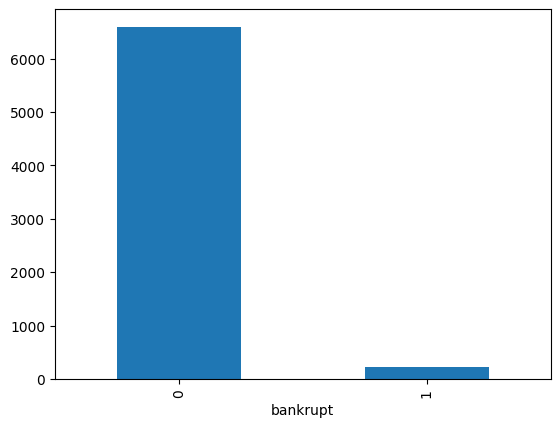

In [61]:
po.print_classes(y)

In [62]:
print(f"Proportion of bankrupt = 'Yes' data: {y.mean().round(2)}")

Proportion of bankrupt = 'Yes' data: 0.03


### <font color='MediumBlue'>5 - <ins> Scaling X, Spliting the dataset in Test and Train</ins>: <font color='violet'></font>

In [63]:
X = po.scaling(X)
X

,roa(c)_before_interest_and_depreciation_before_interest,roa(a)_before_interest_and_%_after_tax,roa(b)_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre-tax_net_interest_rate,after-tax_net_interest_rate,non-industry_income_and_expenditure/revenue,continuous_interest_rate_(after_tax),operating_expense_rate,research_and_development_expense_rate,cash_flow_rate,interest-bearing_debt_interest_rate,tax_rate_(a),net_value_per_share_(b),net_value_per_share_(a),net_value_per_share_(c),persistent_eps_in_the_last_four_seasons,cash_flow_per_share,revenue_per_share_(yuan_¥),operating_profit_per_share_(yuan_¥),per_share_net_profit_before_tax_(yuan_¥),realized_sales_gross_profit_growth_rate,operating_profit_growth_rate,after-tax_net_profit_growth_rate,regular_net_profit_growth_rate,continuous_net_profit_growth_rate,total_asset_growth_rate,net_value_growth_rate,total_asset_return_growth_rate_ratio,cash_reinvestment_%,current_ratio,quick_ratio,interest_expense_ratio,total_debt/total_net_worth,debt_ratio_%,net_worth/assets,long-term_fund_suitability_ratio_(a),borrowing_dependency,contingent_liabilities/net_worth,operating_profit/paid-in_capital,net_profit_before_tax/paid-in_capital,inventory_and_accounts_receivable/net_value,total_asset_turnover,accounts_receivable_turnover,average_collection_days,inventory_turnover_rate_(times),fixed_assets_turnover_frequency,net_worth_turnover_rate_(times),revenue_per_person,operating_profit_per_person,allocation_rate_per_person,working_capital_to_total_assets,quick_assets/total_assets,current_assets/total_assets,cash/total_assets,quick_assets/current_liability,cash/current_liability,current_liability_to_assets,operating_funds_to_liability,inventory/working_capital,inventory/current_liability,current_liabilities/liability,working_capital/equity,current_liabilities/equity,long-term_liability_to_current_assets,retained_earnings_to_total_assets,total_income/total_expense,total_expense/assets,current_asset_turnover_rate,quick_asset_turnover_rate,working_capitcal_turnover_rate,cash_turnover_rate,cash_flow_to_sales,fixed_assets_to_assets,current_liability_to_liability,current_liability_to_equity,equity_to_long-term_liability,cash_flow_to_total_assets,cash_flow_to_liability,cfo_to_assets,cash_flow_to_equity,current_liability_to_current_assets,liability-assets_flag,net_income_to_total_assets,total_assets_to_gnp_price,no-credit_interval,gross_profit_to_sales,net_income_to_stockholder's_equity,liability_to_equity,degree_of_financial_leverage_(dfl),interest_coverage_ratio_(interest_expense_to_ebit),equity_to_liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.258227e-14,0.000000e+00,0.458143,7.323965e-13,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,5.814497e-12,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,0.498498,3.504580e-14,0.263100,0.363725,8.214412e-13,1.308510e-13,0.629951,2.139429e-12,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,1.862304e-13,3.584136e-13,1.822749e-14,1.166173e-14,0.032903,3.877887e-12,0.392913,3.880387e-12,0.672775,0.166673,0.190643,0.004094,2.263913e-13,1.526798e-14,0.147308,0.334015,0.276920,1.045399e-13,0.676269,0.721275,0.339077,2.682638e-12,0.903225,0.002022,0.064856,7.010000e-02,6.550000e-01,0.593831,4.580000e-02,0.671568,5.098627e-11,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0.0,0.716845,9.388432e-13,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.900751e-14,0.000000e+00,0.461867,6.536007e-13,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,7.001435e-12,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,0.611612,4.748554e-14,0.264516,0.376709,2.187711e-12,4.376345e-13,0.635172,1.257786e-12,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.3

In [64]:
X_train, X_test, y_train, y_test = po.spliting(X, y, .20)

In [65]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5455, 94)
(1364, 94)
(5455,)
(1364,)


In [66]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [67]:
po.print_max_min_values(X_test)
po.print_max_min_values(X_train)

Overall Max Value: 1.0
Overall Min Value: 0.0
Overall Max Value: 1.0
Overall Min Value: 0.0


### <font color='MediumBlue'>X- <ins>How many features for my test?</ins>: <font color='violet'></font>

In [68]:
#from sklearn.feature_selection import RFECV
#test = LogisticRegression()
# lm from RFE code
#rfe = RFECV(test, verbose=True)   # for those that like to take advantage of multiple cores, n_jobs=-1
#rfe.fit(X_sca, y)



##  <font color='DarkBlue'>V. <ins> Model Implementation</ins> <font color='blue'></font>

In [81]:
list_models = []
results = pd.DataFrame(columns=['model_name','accuracy','precision','recall','f1_score', 'false_negatives'])

score: 0.9721407624633431
accuracy score: 0.9721407624633431
precision_score: 1.0
recall_score: 0.11627906976744186
5


c:\Users\rober\Ironhack\ml_models_projectweek7\src\pollyfonctions.py:182: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_result],axis=0)


TypeError: 'builtin_function_or_method' object is not subscriptable

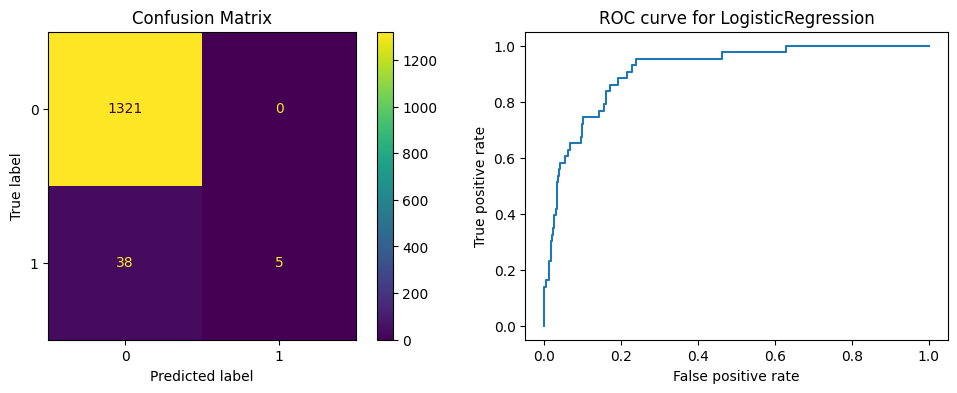

In [89]:
model_lr = LogisticRegression()

model_name = "LogisticRegression"
results = pd.DataFrame(columns=['model_name','accuracy','precision','recall','f1_score', 'false_negatives'])

accuracy, precision, recall, y_pred, results = po.fit_predict_evaluate_fonction(model_name, model_lr, X_train, X_test, y_train, y_test, results)



[LogisticRegression()]

   debt_ratio_%  current_assets/total_assets  net_value_per_share_(a)  \
0      0.207576                     0.190643                 0.147950   
1      0.171176                     0.182419                 0.182251   
2      0.207516                     0.602806                 0.177911   
3      0.151465                     0.225815                 0.154187   
4      0.106509                     0.358380                 0.167502   

   working_capital_to_total_assets  current_liability_to_liability  \
0                         0.672775                        0.676269   
1                         0.751111                        0.308589   
2                         0.829502                        0.446027   
3                         0.725754                        0.615848   
4                         0.751822                        0.975007   

   gross_profit_to_sales  working_capital/equity  \
0               0.601453                0.721275   
1               0.610237            

,model_name,accuracy,precision,recall,f1_score,false_negatives
0,LogisticRegression,0.972141,1.0,0.116279,0.208333,38
0,Logistic_Regression_20rfe,0.969208,1.0,0.023256,0.045455,42


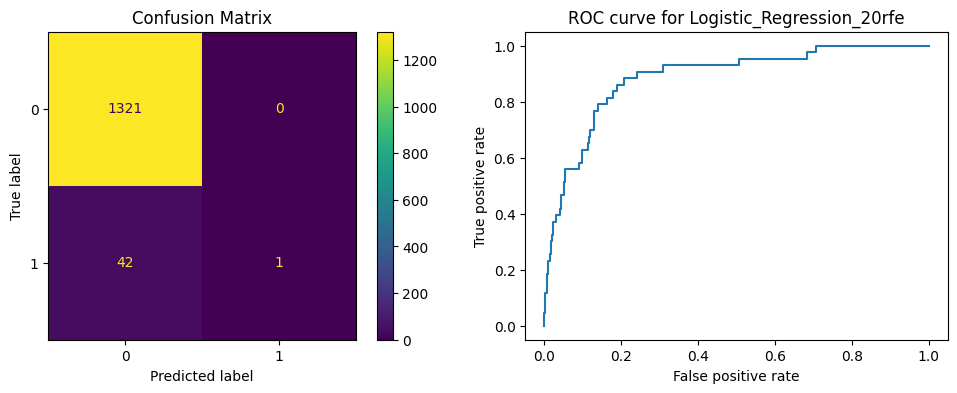

In [84]:
model_lr_rfe = LogisticRegression()
model_name = "Logistic_Regression_20rfe"
list_models.append["model_lr_rfe"]
X = po.generate_X_top20_rfe(df, columns_ranks)
X

X = po.scaling(X)

X_train, X_test, y_train, y_test = po.split_scaler_data(X, y, .20)

accuracy, precision, recall, y_pred, results = po.fit_predict_evaluate_fonction(model_name, model_lr_rfe, X_train, X_test, y_train, y_test, results)

results



In [92]:
model_lr_kbest = LogisticRegression()
model_name = "Logistic_Regression_kbest"
list_models= ["model_lr", "model_lr_kbest", "model_lr_rfe"]
X = po.generates_X_best_ktest(df, columns_ranks, 20)
X

X = po.scaling(X)

X_train, X_test, y_train, y_test = po.split_scaler_data(X, y, .20)

accuracy, precision, recall, y_pred, results = po.fit_predict_evaluate_fonction(model_name, model_lr_rfe, X_train, X_test, y_train, y_test, results)

results


TypeError: 'builtin_function_or_method' object is not subscriptable

   liability-assets_flag  debt_ratio_%  \
0                    0.0      0.207576   
1                    0.0      0.171176   
2                    0.0      0.207516   
3                    0.0      0.151465   
4                    0.0      0.106509   

   roa(a)_before_interest_and_%_after_tax  current_assets/total_assets  \
0                                0.424389                     0.190643   
1                                0.538214                     0.182419   
2                                0.499019                     0.602806   
3                                0.451265                     0.225815   
4                                0.538432                     0.358380   

   net_value_per_share_(a)  working_capital_to_total_assets  \
0                 0.147950                         0.672775   
1                 0.182251                         0.751111   
2                 0.177911                         0.829502   
3                 0.154187                        

,model_name,accuracy,precision,recall,f1_score,false_negatives
0,LogisticRegression,0.972141,1.0,0.116279,0.208333,38
0,Logistic_Regression_rfe,0.972141,1.0,0.116279,0.208333,38
0,Logistic_Regression_rfe,0.972141,1.0,0.116279,0.208333,38


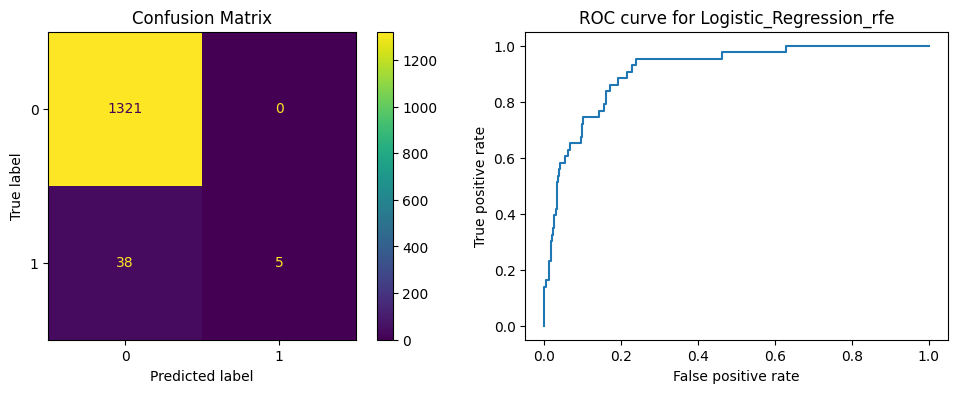

In [97]:
model_lr_rfe2 = LogisticRegression()
model_name = "Logistic_Regression_rfe"
list_models= ["model_lr", "model_lr_kbest", "model_lr_rfe", "model_lr_rfe2"]
X = po.generate_X_best_rfe(df, columns_ranks, 20)
X

X = po.scaling(X)

X_train, X_test, y_train, y_test = po.split_scaler_data(X, y, .20)

accuracy, precision, recall, y_pred, results = po.fit_predict_evaluate_fonction(model_name, model_lr_rfe, X_train, X_test, y_train, y_test, results)

results


In [98]:
results

,model_name,accuracy,precision,recall,f1_score,false_negatives
0,LogisticRegression,0.972141,1.0,0.116279,0.208333,38
0,Logistic_Regression_rfe,0.972141,1.0,0.116279,0.208333,38
0,Logistic_Regression_rfe,0.972141,1.0,0.116279,0.208333,38


##  <font color='DarkBlue'>VI. <ins> Model Evaluation</ins> <font color='blue'></font>

In [ ]:
# List of models
# list_models = [model_dt, model_knn, model_lr]
# scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
# Specify the number of folds
# num_folds = 5
# Create a stratified K-fold cross-validator
# Specify the scoring metrics you want to evaluate
# Loop through each model and evaluate 



# num_folds = 5
# scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# test_results = po.evaluate_models(list_models, scoring_metrics, num_folds, X_train, y_train)

# test_results

UnboundLocalError: local variable 'results' referenced before assignment

In [ ]:
results

,model_name,accuracy,precision,recall,f1_score,false_negatives
0,LogisticRegression,0.970674,0.714286,0.116279,0.2,38


In [ ]:
# cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# po.evaluate_model(model_LR, X, y, cv, scoring_metrics)

NameError: name 'StratifiedKFold' is not defined

In [ ]:
results

,model_name,accuracy,precision,recall,f1_score,false_negatives
0,LogisticRegression,0.970674,0.714286,0.116279,0.2,38


In [ ]:
models = [model_dt, model_knn, model_lr]

# Specify the number of folds (e.g., 5)
num_folds = 5

# Create a stratified K-fold cross-validator
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Loop through each model and perform cross-validation
for model in models:
    # Perform cross-validation and get the model scores
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    
    # Print the cross-validated scores for the current model
    print(f"Model: {type(model).__name__}")
    print("Cross-validated Scores:", scores)
    print(f"Mean Score: {scores.mean():.4f}")
    print(f"Standard Deviation: {scores.std():.4f}")
    print("\n")


NameError: name 'model_dt' is not defined

In [ ]:
clf = DecisionTreeClassifier(random_state=42)

from sklearn.metrics import make_scorer

scoring = {'prec_macro': 'precision_macro',
            'rec_macro': make_scorer(recall_score, average='macro')}
scores = cross_validate(clf, X, y, scoring=scoring,
                        cv=5, return_train_score=True)
sorted(scores.keys())
['fit_time', 'score_time', 'test_prec_macro', 'test_rec_macro',
 'train_prec_macro', 'train_rec_macro']
scores['train_rec_macro']
array([0.97, 0.99, 0.98, 0.98])

scores = cross_validate(clf, X, y,
                       scoring='precision_macro', cv=5,
           return_estimator=True)
sorted(scores.keys())
['estimator', 'fit_time', 'score_time', 'test_score']

NameError: name 'cross_validate' is not defined